# Plotting with Matplotlib

## Objective:
In this tutorial, we will explore the Iris dataset, a popular dataset in machine learning and data science. We'll load the dataset, examine its features, and create visualizations.

## Pre-requisites:

- Python Environment: You should have a Python environment set up on your system. If you don't have Python installed, you can download it from the [official Python website](https://www.python.org/downloads/). We recommend downloading Python 3.8 or above.
- Jupyter Notebook: This code is intended to be run in a Jupyter Notebook environment. Make sure you have [Jupyter Notebook installed](https://jupyter.org/install).
- Library Installation: Before starting this tutorial, make sure you have the following libraries installed:
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Scikit-Learn

To install, run the following commands:
"**!pip3 install pandas numpy matplotlib seaborn scikit-learn**"

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Loading the Iris Dataset
We'll start by loading the Iris dataset.

The Iris dataset is a widely used dataset in machine learning and statistics. The dataset consists of 150 Iris flowers from three different species: 
- Iris setosa
- Iris versicolor
- Iris virginica.

Each species is represented by 50 samples. This dataset has 150 rows where each row represents a single iris flower sample. It has 5 columns (features). The first four columns represent four different measurements of the iris flowers' attributes:
- Sepal Length (in centimeters)
- Sepal Width (in centimeters)
- Petal Length (in centimeters)
- Petal Width (in centimeters)

The fifth column is the species label, indicating the species of the iris flower:
- Iris setosa
- Iris versicolor
- Iris virginica

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Exploration
Now that we have the dataset loaded, let's explore it by checking its basic information and statistics.

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry missing values.
- There are 50 observations of each species (setosa, versicolor, virginica).

In [4]:
# Display summary statistics of the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Let's break down the information in the output:

- **count**: This shows the count of non-null data points for each column. In this case, there are 150 data points for all columns, meaning there are no missing values in the dataset.
- **mean**: This displays the mean (average) value for each column. For example, the mean "SepalLengthCm" is approximately 5.843333, meaning that on average, the Sepal length is around 5.843333 centimeters across all data points.
- **std**: This represents the standard deviation for each column. Standard deviation is a measure of the spread or variability of data. For instance, the standard deviation for "SepalLengthCm" is approximately 0.828066, indicating the degree of variability in Sepal length.
- **min**: These values indicate the minimum values observed in each column. For example, the minimum "SepalLengthCm" is 4.3, which is the smallest recorded Sepal length in the dataset.
- **25%**: This represents the 25th percentile values for each column. The 25th percentile is a measure of the data distribution, indicating the value below which 25% of the data falls. For example, "25% SepalLengthCm" is 5.1, meaning that 25% of the data points have a Sepal length of 5.1 cm or less.
- **50%**: This represents the 50th percentile value, which is also known as the median. The median is the middle value in a sorted dataset. For "50% SepalLengthCm," it's 5.8, meaning that 50% of the data points have Sepal length values of 5.8 cm or less.
- **75%**: This shows the 75th percentile values. The 75th percentile indicates the value below which 75% of the data falls. For example, "75% SepalLengthCm" is 6.4, meaning that 75% of the data points have Sepal length values of 6.4 cm or less.
- **max**: These values indicate the maximum values observed in each column. For instance, the maximum "SepalLengthCm" is 7.9, which is the largest recorded Sepal length in the dataset.

### Data Visualization
We can create visualizations to better understand the dataset. We'll start by importing the necessary plotting libraries and creating some visualizations.

#### Pair plot
This plot shows scatterplots of all possible feature combinations and colors the points based on the target class (Iris species). It helps us visualize how features relate to each other.

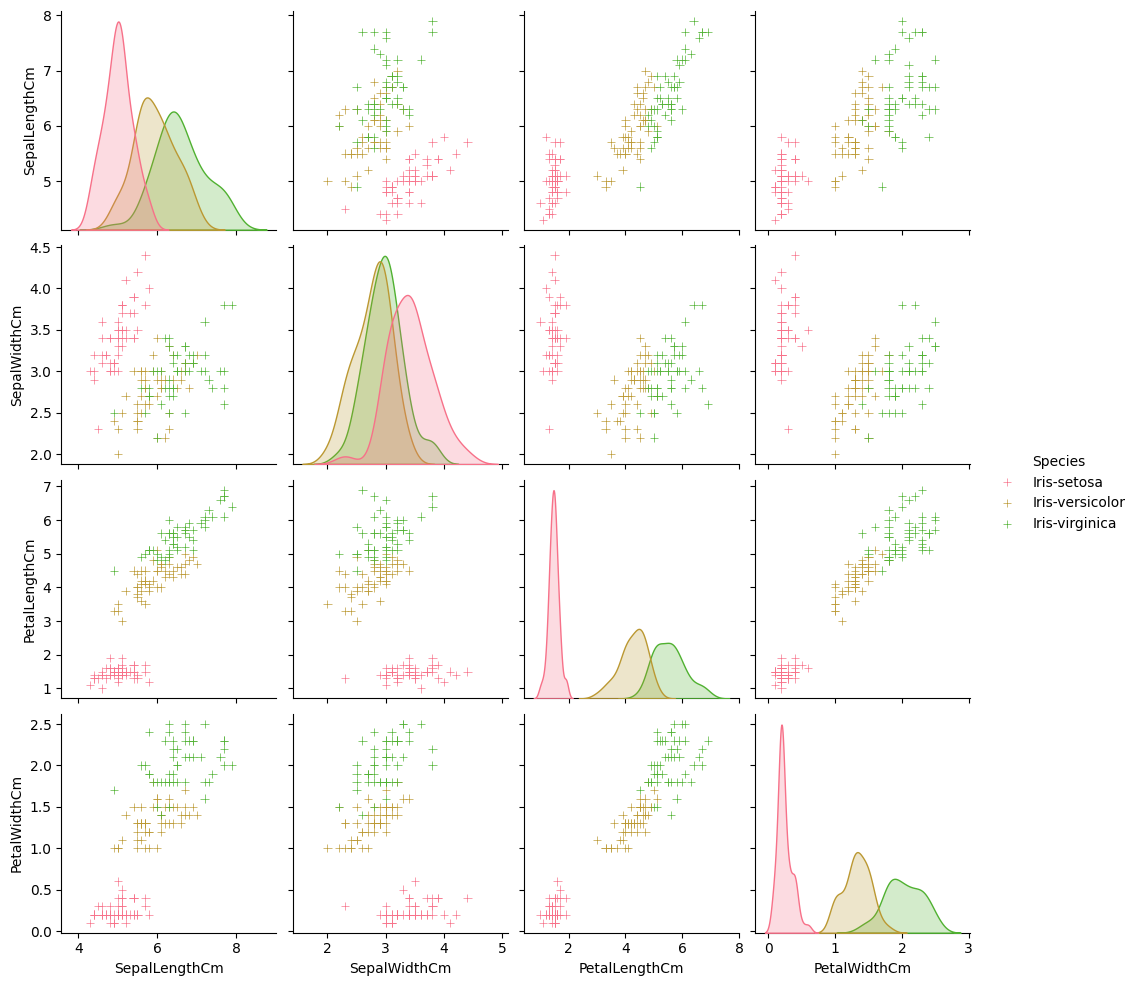

In [55]:
iris_df = iris.drop('Id', axis=1)
pair_plot = sns.pairplot(iris_df, hue='Species', markers='+')
plt.show()

We learn that: 

- **PetalLength** and **PetalWidth** are significantly more useful attributes in order to identify various flower types. 
- The relationship between pairs of features of Iris-Setosa (in pink) is distinctly different from those of the other two species.
- We observe some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

/var/folders/_j/p4g8fy456ybcxcmzhmj8sldc0000gn/T/ipykernel_27579/1404758125.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["setosa", "versicolor", "virginica"])


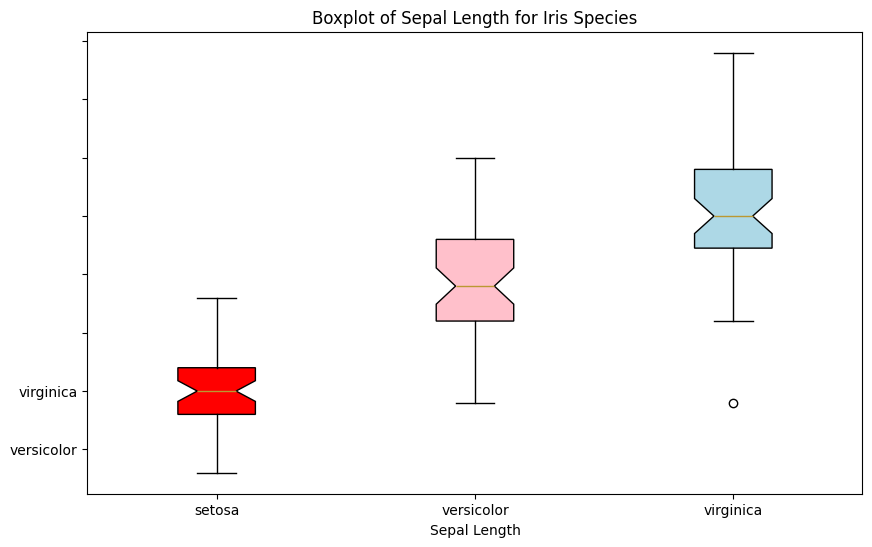

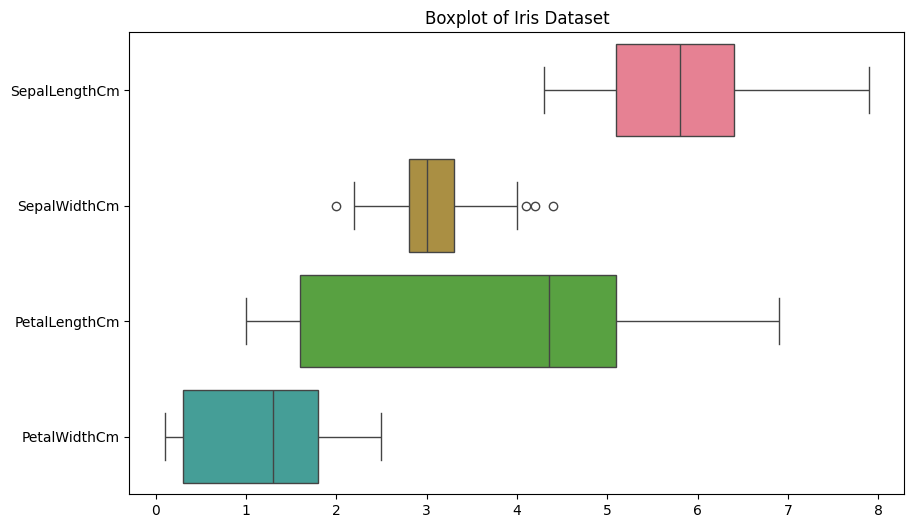

In [7]:
# Create a boxplot for the Iris dataset
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=iris_df, orient="h")

plt.title("Boxplot of Iris Dataset")
plt.show()

To interpret a boxplot, we pay attention to:  
- **Box and Whiskers Structure**: The boxplot consists of a rectangular box and two whiskers extending from it.
- **Box Center**: The box represents the interquartile range (IQR) and contains the median (50th percentile) of the data. It gives insights into the central tendency of the dataset.
- **Whiskers**: The whiskers extend from the box to the minimum and maximum values within a specified range, excluding outliers.
- **Outliers**: Individual data points beyond the whiskers are considered outliers and are displayed as separate points. Outliers can be indicative of unusual or extreme data values.
- **IQR and Spread**: The length of the box (IQR) indicates the spread of the central 50% of the data.
- **Symmetry and Skewness**: The symmetry or skewness of the data can be inferred from the box's position within the plot. A centered box suggests symmetry, while an offset box suggests skewness.

The boxplot provides us with:
- Minimum score: The minimum value in the dataset.
- First quartile: Information on the 25% of the dataset.
- Median: Information on the 50% of the dataset.
- Third Quartile: Information on 75% of the dataset.
- Maximum Score: The highest value in the dataset.

From the boxplots, we can see that some features (e.g., petal length and petal width) have significant differences in their distributions among the three species, making them valuable for classification.


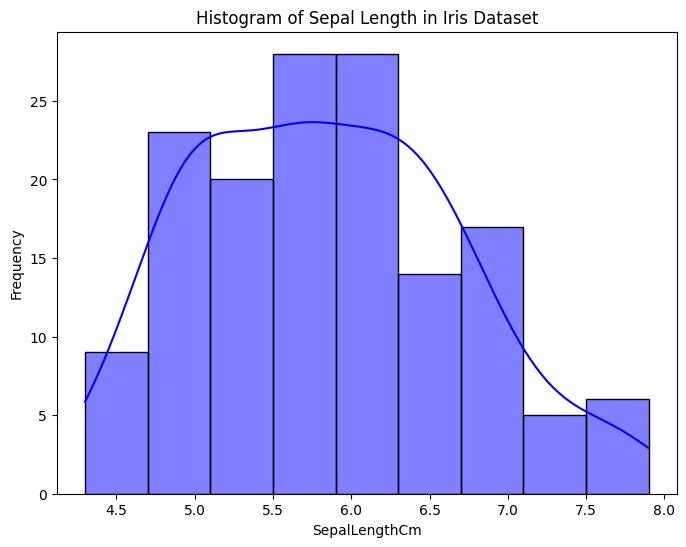

In [8]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(iris['SepalLengthCm'], kde=True, color='blue')
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.title(f'Histogram of Sepal Length in Iris Dataset')
plt.show()

How you can interpret a histogram:
- **Data Distribution**: A histogram allows you to quickly grasp the overall distribution of the data. You can see whether the data is skewed to the left (negative skew), skewed to the right (positive skew), or relatively symmetrical (bell-shaped).
- **Central Tendency**: The center of the histogram typically corresponds to the central tendency of the data. For example, in a normal distribution, the peak of the histogram represents the mean (average) of the dataset.
- **Spread/Dispersion**: The width of the histogram bars reflects the spread or dispersion of the data. A wide histogram suggests greater variability, while a narrow one indicates less variability.
- **Outliers**: Outliers or extreme values are often visible as bars that are significantly taller or shorter than the rest. They stand out as unusual data points.
- **Bimodal or Multimodal Distributions**: If you see multiple peaks (high bars) in the histogram, it may indicate that the data has more than one mode, meaning it is bimodal or multimodal.
- **Skewness**: The direction of skewness can be determined by the longer tail of the histogram. If the tail is on the right, the distribution is positively skewed, and if it's on the left, it's negatively skewed.
- **Gaps and Gaps Between Bars**: Gaps between bars in the histogram can indicate discontinuities in the data. It can be useful for identifying missing data or errors.
- **Range**: The range of the x-axis (horizontal) represents the entire range of values in the dataset.